In [210]:
from kneed import KneeLocator
import numpy as np
import pandas
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans, Birch, SpectralClustering, OPTICS

from matplotlib import pyplot as plt
import numpy as np
import seaborn

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_row', None)

In [211]:
countries_raw_data = pandas.read_csv('data/Country-data.csv')
countries_raw_data

country  child_mort  exports  health   imports  \
0                       Afghanistan        90.2   10.000    7.58   44.9000   
1                           Albania        16.6   28.000    6.55   48.6000   
2                           Algeria        27.3   38.400    4.17   31.4000   
3                            Angola       119.0   62.300    2.85   42.9000   
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   
5                         Argentina        14.5   18.900    8.10   16.0000   
6                           Armenia        18.1   20.800    4.40   45.3000   
7                         Australia         4.8   19.800    8.73   20.9000   
8                           Austria         4.3   51.300   11.00   47.8000   
9                        Azerbaijan        39.2   54.300    5.88   20.7000   
10                          Bahamas        13.8   35.000    7.89   43.7000   
11                          Bahrain         8.6   69.500    4.97   50.9000   
12                       Bangladesh        49.4   16.000    3.52   21.8000   
13                         Barbados        14.2   39.500    7.97   48.7000   
14                          Belarus         5.5   51.400    5.61   64.5000   
15                          Belgium         4.5   76.400   10.70   74.7000   
16                           Belize        18.8   58.200    5.20   57.5000   
17                            Benin       111.0   23.800    4.10   37.2000   
18                           Bhutan        42.7   42.500    5.20   70.7000   
19                          Bolivia        46.6   41.200    4.84   34.3000   
20           Bosnia and Herzegovina         6.9   29.700   11.10   51.3000   
21                         Botswana        52.5   43.600    8.30   51.3000   
22                           Brazil        19.8   10.700    9.01   11.8000   
23                           Brunei        10.5   67.400    2.84   28.0000   
24                         Bulgaria        10.8   50.200    6.87   53.0000   
25                     Burkina Faso       116.0   19.200    6.74   29.6000   
26                          Burundi        93.6    8.920   11.60   39.2000   
27                         Cambodia        44.4   54.100    5.68   59.5000   
28                         Cameroon       108.0   22.200    5.13   27.0000   
29                           Canada         5.6   29.100   11.30   31.0000   
30                       Cape Verde        26.5   32.700    4.09   61.8000   
31         Central African Republic       149.0   11.800    3.98   26.5000   
32                             Chad       150.0   36.800    4.53   43.5000   
33                            Chile         8.7   37.700    7.96   31.3000   
34                            China        15.7   26.300    5.07   22.6000   
35                         Colombia        18.6   15.900    7.59   17.8000   
36                          Comoros        88.2   16.500    4.51   51.7000   
37                 Congo, Dem. Rep.       116.0   41.100    7.91   49.6000   
38                      Congo, Rep.        63.9   85.100    2.46   54.7000   
39                       Costa Rica        10.2   33.200   10.90   35.0000   
40                    Cote d'Ivoire       111.0   50.600    5.30   43.3000   
41                          Croatia         5.5   37.600    7.76   38.1000   
42                           Cyprus         3.6   50.200    5.97   57.5000   
43                   Czech Republic         3.4   66.000    7.88   62.9000   
44                          Denmark         4.1   50.500   11.40   43.6000   
45               Dominican Republic        34.4   22.700    6.22   33.3000   
46                          Ecuador        25.1   27.900    8.06   32.4000   
47                            Egypt        29.1   21.300    4.66   26.6000   
48                      El Salvador        19.2   26.900    6.91   46.6000   
49                Equatorial Guinea       111.0   85.800    4.48   58.9000   
50                          Eritrea        55.2   

EDA

In [212]:
countries_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [213]:
countries_raw_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [214]:
countries_raw_data.duplicated().sum()

0

In [215]:
countries_raw_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_11239/209332700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(countries_raw_data.corr(), annot=True)


<AxesSubplot: >

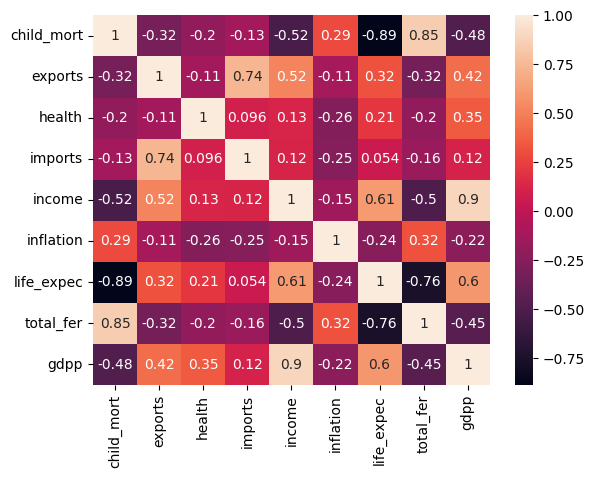

In [216]:
seaborn.heatmap(countries_raw_data.corr(), annot=True)

<AxesSubplot: xlabel='child_mort'>

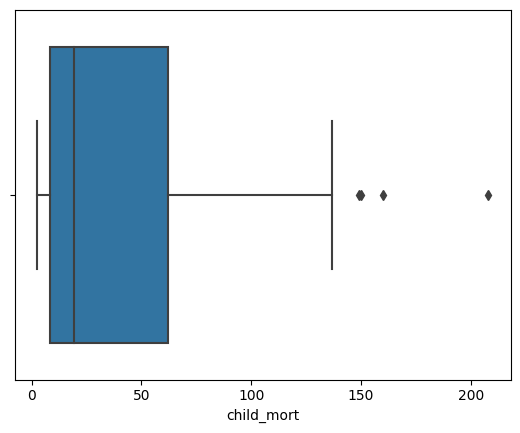

In [217]:
seaborn.boxplot(x=countries_raw_data['child_mort'])

<AxesSubplot: xlabel='income'>

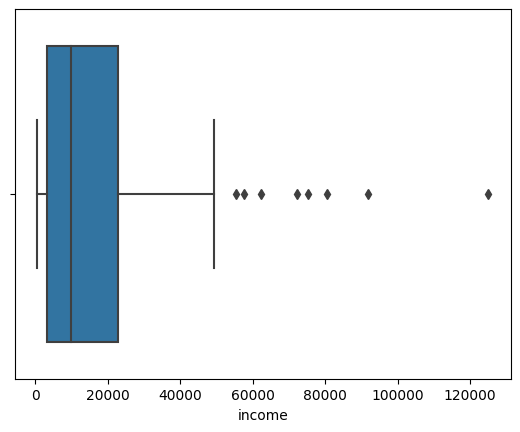

In [21]:
seaborn.boxplot(x=countries_raw_data['income'])

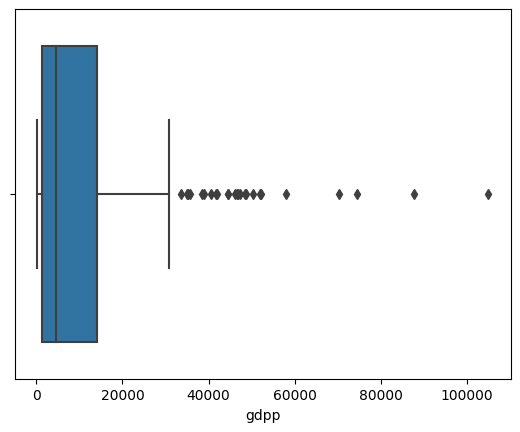

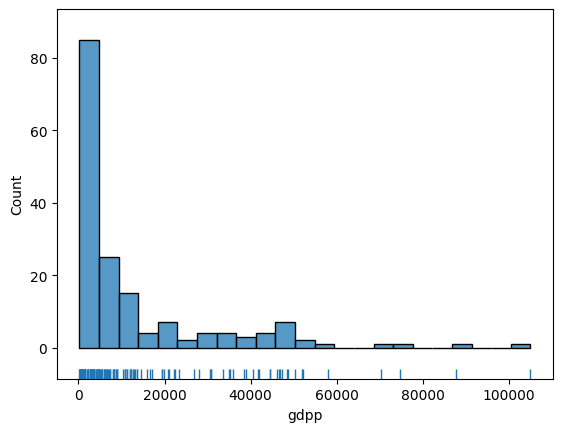

'Countries with gdpp higher 60000'

country  child_mort  exports  health  imports  income  inflation  \
91    Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
114       Norway         3.2     39.7    9.48     28.5   62300      5.950   
123        Qatar         9.0     62.3    1.81     23.8  125000      6.980   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   

     life_expec  total_fer    gdpp  
91         81.3       1.63  105000  
114        81.0       1.95   87800  
123        79.5       2.07   70300  
145        82.2       1.52   74600

'Countries that would be dropped due to quantile=0.9'

country  child_mort  exports  health  imports  income  inflation  \
7        Australia         4.8     19.8    8.73     20.9   41400      1.160   
8          Austria         4.3     51.3   11.00     47.8   43200      0.873   
15         Belgium         4.5     76.4   10.70     74.7   41100      1.880   
29          Canada         5.6     29.1   11.30     31.0   40700      2.870   
44         Denmark         4.1     50.5   11.40     43.6   44000      3.220   
53         Finland         3.0     38.7    8.95     37.4   39800      0.351   
68         Iceland         2.6     53.4    9.40     43.3   38800      5.470   
73         Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
77           Japan         3.2     15.0    9.49     13.6   35800     -1.900   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
110    Netherlands         4.5     72.0   11.90     63.6   45500      0.848   
114         Norway         3.2     39.7    9.48     28.5   62300      5.950   
123          Qatar         9.0     62.3    1.81     23.8  125000      6.980   
133      Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
144         Sweden         3.0     46.2    9.63     40.7   42900      0.991   
145    Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
159  United States         7.3     12.4   17.90     15.8   49400      1.220   

     life_expec  total_fer    gdpp  
7          82.0       1.93   51900  
8          80.5       1.44   46900  
15         80.0       1.86   44400  
29         81.3       1.63   47400  
44         79.5       1.87   58000  
53         80.0       1.87   46200  
68         82.0       2.20   41900  
73         80.4       2.05   48700  
77         82.8       1.39   44500  
91         81.3       1.63  105000  
110        80.7       1.79   50300  
114        81.0       1.95   87800  
123        79.5       2.07   70300  
133        82.7       1.15   46600  
144        81.5       1.98   52100  
145        82.2       1.52   74600  
159        78.7       1.93   48400

In [218]:
seaborn.boxplot(x=countries_raw_data['gdpp'])
plt.show()

seaborn.rugplot(countries_raw_data['gdpp'], expand_margins=True)
seaborn.histplot(countries_raw_data['gdpp'])
plt.show()
display("Countries with gdpp higher 60000", countries_raw_data[countries_raw_data['gdpp'] > 60000])
display("Countries that would be dropped due to quantile=0.9", countries_raw_data[countries_raw_data['gdpp'] > countries_raw_data['gdpp'].quantile(0.9)])

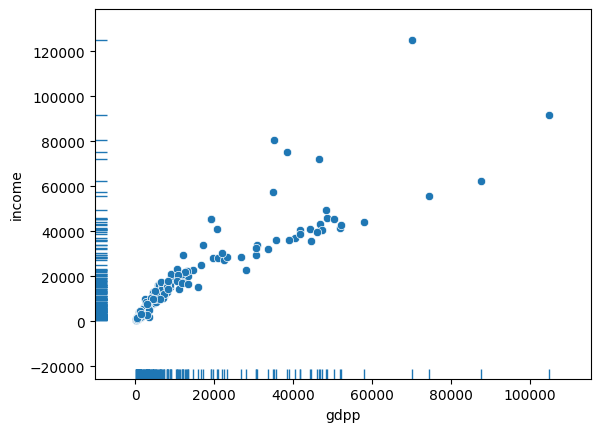

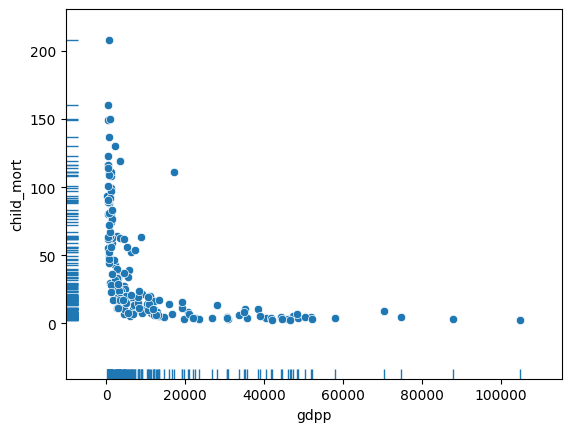

<AxesSubplot: xlabel='income', ylabel='child_mort'>

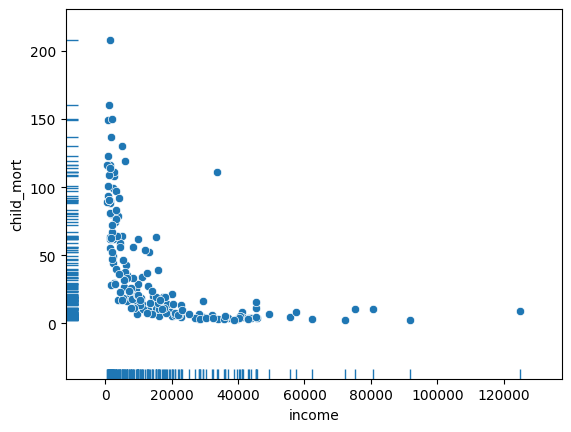

In [219]:
seaborn.scatterplot(data = countries_raw_data, x = "gdpp", y = "income")
seaborn.rugplot(data = countries_raw_data, x = "gdpp", y = "income")
plt.show()
seaborn.scatterplot(data = countries_raw_data, x = "gdpp", y = "child_mort")
seaborn.rugplot(data = countries_raw_data, x = "gdpp", y = "child_mort")
plt.show()
seaborn.scatterplot(data = countries_raw_data, x = "income", y = "child_mort")
seaborn.rugplot(data = countries_raw_data, x = "income", y = "child_mort")

In [220]:
input_data = countries_raw_data.drop(["country"], axis=1)
input_data

child_mort  exports  health   imports  income  inflation  life_expec  \
0          90.2   10.000    7.58   44.9000    1610      9.440        56.2   
1          16.6   28.000    6.55   48.6000    9930      4.490        76.3   
2          27.3   38.400    4.17   31.4000   12900     16.100        76.5   
3         119.0   62.300    2.85   42.9000    5900     22.400        60.1   
4          10.3   45.500    6.03   58.9000   19100      1.440        76.8   
5          14.5   18.900    8.10   16.0000   18700     20.900        75.8   
6          18.1   20.800    4.40   45.3000    6700      7.770        73.3   
7           4.8   19.800    8.73   20.9000   41400      1.160        82.0   
8           4.3   51.300   11.00   47.8000   43200      0.873        80.5   
9          39.2   54.300    5.88   20.7000   16000     13.800        69.1   
10         13.8   35.000    7.89   43.7000   22900     -0.393        73.8   
11          8.6   69.500    4.97   50.9000   41100      7.440        76.0   
12         49.4   16.000    3.52   21.8000    2440      7.140        70.4   
13         14.2   39.500    7.97   48.7000   15300      0.321        76.7   
14          5.5   51.400    5.61   64.5000   16200     15.100        70.4   
15          4.5   76.400   10.70   74.7000   41100      1.880        80.0   
16         18.8   58.200    5.20   57.5000    7880      1.140        71.4   
17        111.0   23.800    4.10   37.2000    1820      0.885        61.8   
18         42.7   42.500    5.20   70.7000    6420      5.990        72.1   
19         46.6   41.200    4.84   34.3000    5410      8.780        71.6   
20          6.9   29.700   11.10   51.3000    9720      1.400        76.8   
21         52.5   43.600    8.30   51.3000   13300      8.920        57.1   
22         19.8   10.700    9.01   11.8000   14500      8.410        74.2   
23         10.5   67.400    2.84   28.0000   80600     16.700        77.1   
24         10.8   50.200    6.87   53.0000   15300      1.110        73.9   
25        116.0   19.200    6.74   29.6000    1430      6.810        57.9   
26         93.6    8.920   11.60   39.2000     764     12.300        57.7   
27         44.4   54.100    5.68   59.5000    2520      3.120        66.1   
28        108.0   22.200    5.13   27.0000    2660      1.910        57.3   
29          5.6   29.100   11.30   31.0000   40700      2.870        81.3   
30         26.5   32.700    4.09   61.8000    5830      0.505        72.5   
31        149.0   11.800    3.98   26.5000     888      2.010        47.5   
32        150.0   36.800    4.53   43.5000    1930      6.390        56.5   
33          8.7   37.700    7.96   31.3000   19400      8.960        79.1   
34         15.7   26.300    5.07   22.6000    9530      6.940        74.6   
35         18.6   15.900    7.59   17.8000   10900      3.860        76.4   
36         88.2   16.500    4.51   51.7000    1410      3.870        65.9   
37        116.0   41.100    7.91   49.6000     609     20.800        57.5   
38         63.9   85.100    2.46   54.7000    5190     20.700        60.4   
39         10.2   33.200   10.90   35.0000   13000      6.570        80.4   
40        111.0   50.600    5.30   43.3000    2690      5.390        56.3   
41          5.5   37.600    7.76   38.1000   20100      0.821        76.3   
42          3.6   50.200    5.97   57.5000   33900      2.010        79.9   
43          3.4   66.000    7.88   62.9000   28300     -1.430        77.5   
44          4.1   50.500   11.40   43.6000   44000      3.220        79.5   
45         34.4   22.700    6.22   33.3000   11100      5.440        74.6   
46         25.1   27.900    8.06   32.4000    9350      7.470        76.7   
47         29.1   21.300    4.66   26.6000    9860     10.100        70.5   
48         19.2   26.900    6.91   46.6000    7300      2.650        74.1   
49        111.0   85.800    4.48   58.9000   33700     24.900        60.9   
50         55.2    4.790    2.66   23.3000    1420     11.600        61.7   
5

In [221]:
scaler = MinMaxScaler()
input_data_normalized = scaler.fit_transform(input_data)
input_data_normalized = pandas.DataFrame(input_data_normalized, columns=input_data.columns, index=input_data.index)
input_data_normalized

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
5      0.057936  0.094006  0.390926  0.091610  0.145437   0.232049   
6      0.075463  0.103511  0.160970  0.260065  0.048967   0.110711   
7      0.010711  0.098509  0.430081  0.119782  0.327926   0.049626   
8      0.008277  0.256095  0.571162  0.274438  0.342396   0.046973   
9      0.178189  0.271103  0.252952  0.118632  0.123731   0.166436   
10     0.054528  0.174550  0.377874  0.250866  0.179201   0.035274   
11     0.029211  0.347144  0.196395  0.292261  0.325514   0.107661   
12     0.227848  0.079498  0.106277  0.124956  0.014720   0.104889   
13     0.056475  0.197062  0.382846  0.279612  0.118103   0.041872   
14     0.014119  0.256595  0.236172  0.370451  0.125339   0.178449   
15     0.009250  0.381663  0.552517  0.429094  0.325514   0.056279   
16     0.078870  0.290613  0.210690  0.330206  0.058453   0.049441   
17     0.527751  0.118520  0.142324  0.213495  0.009735   0.047084   
18     0.195229  0.212071  0.210690  0.406097  0.046716   0.094261   
19     0.214216  0.205567  0.188316  0.196822  0.038596   0.120044   
20     0.020935  0.148036  0.577377  0.294560  0.073245   0.051844   
21     0.242941  0.217574  0.403356  0.294560  0.102025   0.121338   
22     0.083739  0.052984  0.447483  0.067463  0.111672   0.116625   
23     0.038462  0.336638  0.064015  0.160602  0.643061   0.193235   
24     0.039922  0.250592  0.314481  0.304334  0.118103   0.049164   
25     0.552093  0.095507  0.306401  0.169801  0.006600   0.101839   
26     0.443038  0.044079  0.608452  0.224994  0.001246   0.152574   
27     0.203505  0.270102  0.240522  0.341705  0.015363   0.067739   
28     0.513145  0.110515  0.206339  0.154852  0.016488   0.056557   
29     0.014606  0.145034  0.589807  0.177850  0.322298   0.065428   
30     0.116358  0.163044  0.141703  0.354928  0.041972   0.043573   
31     0.712756  0.058487  0.134866  0.151978  0.002243   0.057481   
32     0.717624  0.183555  0.169049  0.249716  0.010620   0.097958   
33     0.029698  0.188057  0.382225  0.179574  0.151064   0.121708   
34     0.063778  0.131026  0.202610  0.129555  0.071717   0.103040   
35     0.077897  0.078998  0.359229  0.101959  0.082731   0.074577   
36     0.416748  0.082000  0.167806  0.296860  0.006439   0.074670   
37     0.552093  0.205067  0.379117  0.284787  0.000000   0.231125   
38     0.298442  0.425187  0.040398  0.314108  0.036827   0.230201   
39     0.037001  0.165545  0.564947  0.200847  0.099613   0.099621   
40     0.527751  0.252593  0.216905  0.248566  0.016730   0.088716   
41     0.014119  0.187557  0.369795  0.218670  0.156691   0.046493   
42     0.004869  0.250592  0.258546  0.330206  0.267632   0.057481   
43     0.003895  0.329635  0.377253  0.361252  0.222613   0.025691   
44     0.007303  0.252092  0.596022  0.250291  0.348827   0.068663   
45     0.154820  0.113017  0.274083  0.191073  0.084339   0.089178   
46     0.109542  0.139031  0.388440  0.185899  0.070270   0.107938   
47     0.129017  0.106013  0.177129  0.152553  0.074370   0.132243   
48     0.080818  0.134028  0.316967  0.267539  0.053790   0.063395   
49     0.527751  0.428689  0.165942  0.338255  0.266024   0.269014   
50     0.256086  0.023418  0.052828  0.133580  0.006520   0.146105   
51     0.009250  0.375159  0.262275  0.394598  0.177593   0.054986   
52     0.104674  0.288612  0.189559  0.367002  0.054192   0.077996   
53     0.001947  0.193060  0.443754  0.214645  0.315063   0.042150   
54     0.007790  0.133528  0.627098  0.161177  0.291749   0.048609   
55     0.297468  0.288112  0.105034  0.108283  0.118907   0.192311   
56     0.378286

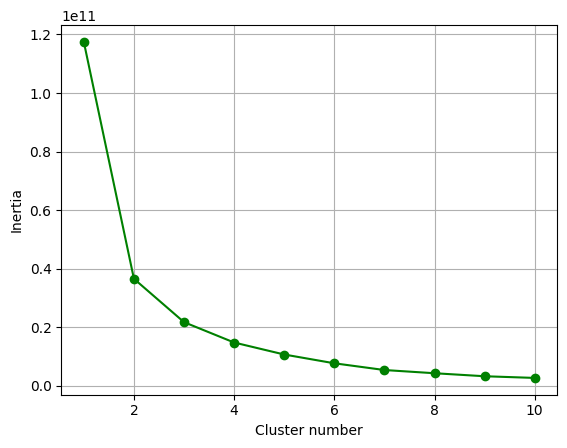

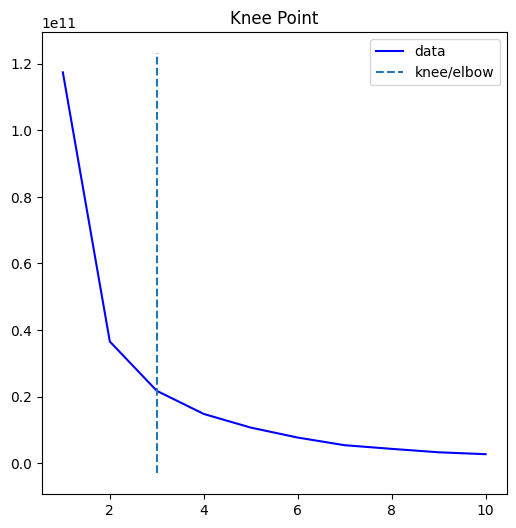

'Number of clusters'

3

In [222]:
inertias = []
no_countries_raw_data = countries_raw_data.drop(["country"], axis=1)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(no_countries_raw_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o', color = 'green')
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.grid()
plt.show()

kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
kl.plot_knee()
plt.show()
clusterNumber = kl.elbow
display("Number of clusters", clusterNumber)

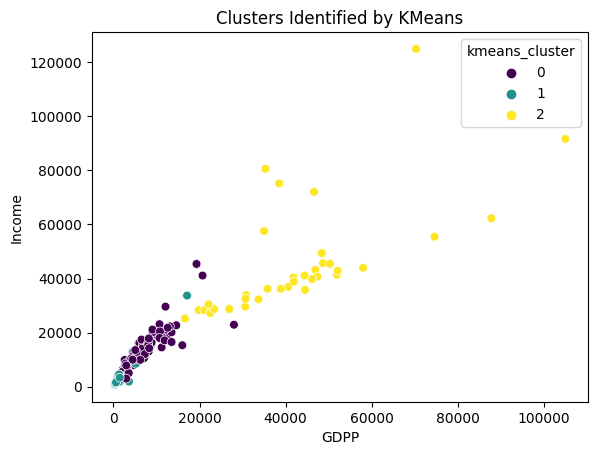

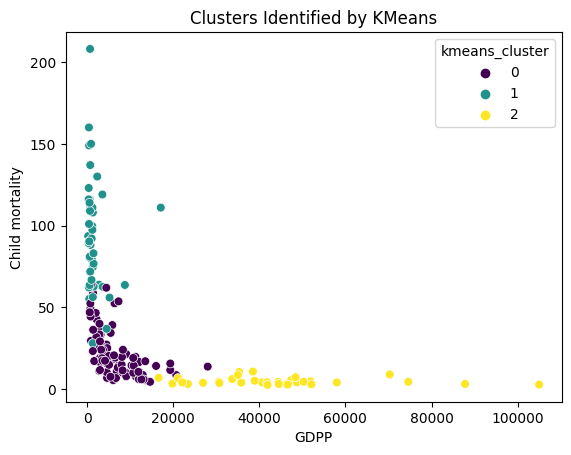

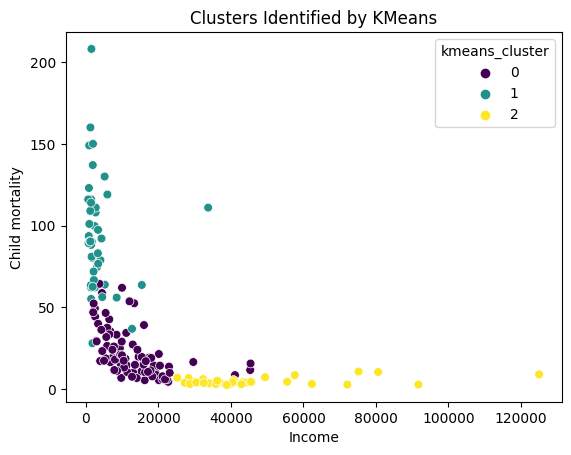

In [223]:
kmeans_clusters = KMeans(clusterNumber).fit_predict(input_data_normalized)
countries_raw_data['kmeans_cluster'] = kmeans_clusters

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="income", hue='kmeans_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by KMeans')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="child_mort", hue='kmeans_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by KMeans')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="income", y="child_mort", hue='kmeans_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by KMeans')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

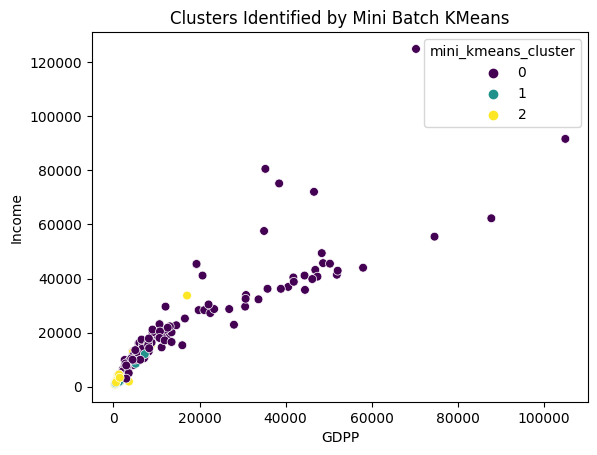

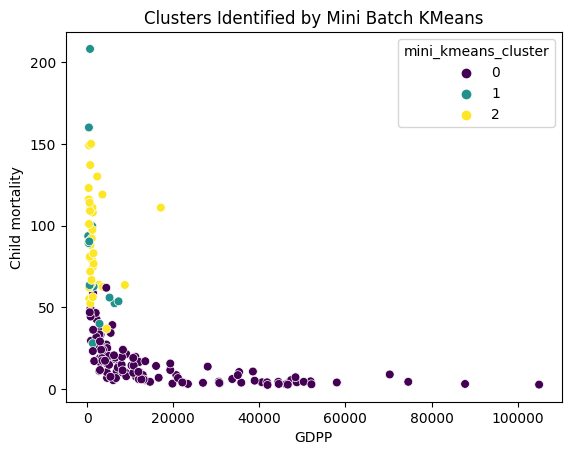

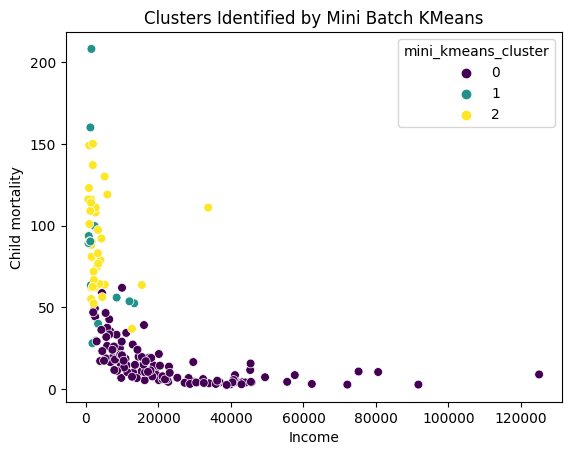

In [224]:
mini_kmeans_clusters= MiniBatchKMeans(clusterNumber).fit_predict(input_data_normalized)
countries_raw_data['mini_kmeans_cluster'] = mini_kmeans_clusters

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="income", hue='mini_kmeans_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Mini Batch KMeans')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="child_mort", hue='mini_kmeans_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Mini Batch KMeans')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="income", y="child_mort", hue='mini_kmeans_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Mini Batch KMeans')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

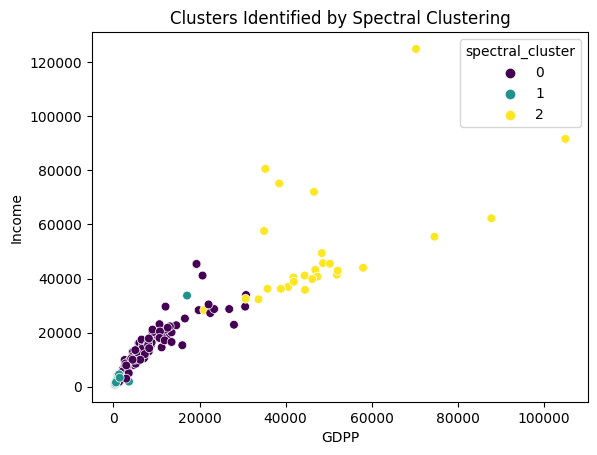

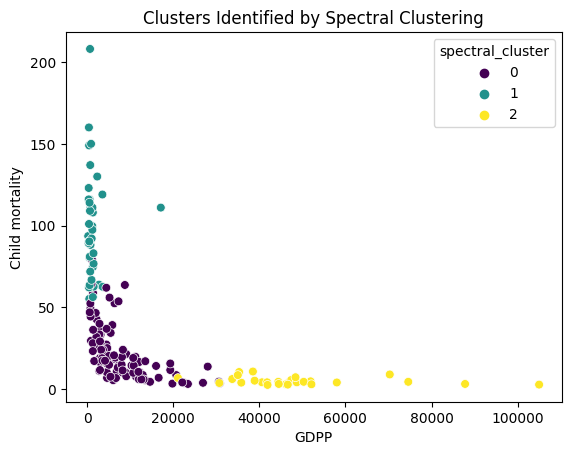

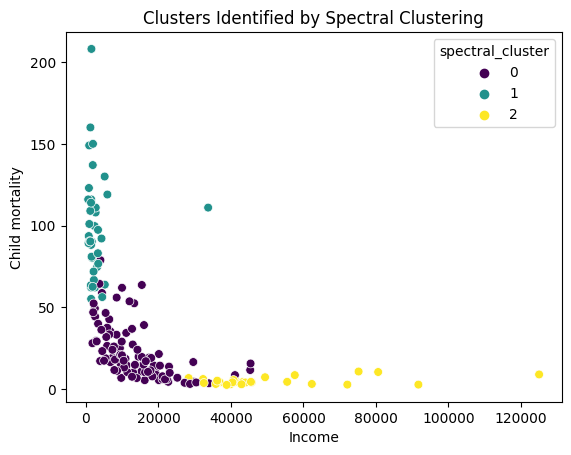

In [225]:
spectral_clusters= SpectralClustering(n_clusters=clusterNumber).fit_predict(input_data_normalized)
countries_raw_data['spectral_cluster'] = spectral_clusters

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="income", hue='spectral_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Spectral Clustering')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="child_mort", hue='spectral_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Spectral Clustering')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="income", y="child_mort", hue='spectral_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Spectral Clustering')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

In [226]:
thresholds = [0.01 + x*0.01 for x in range(100)]
for i in thresholds:
    birch_metrics = Birch(threshold=i, n_clusters=clusterNumber).fit(input_data_normalized)
    if len(set(birch_metrics.labels_)) > 1:
        print(f"For threshold={i}, score is ", silhouette_score(input_data_normalized, birch_metrics.labels_))

For threshold=0.01, score is  0.31627506051649634
For threshold=0.02, score is  0.31627506051649634
For threshold=0.03, score is  0.30667337217807045
For threshold=0.04, score is  0.31627506051649634
For threshold=0.05, score is  0.31758053035382466
For threshold=0.060000000000000005, score is  0.31623411110441535
For threshold=0.06999999999999999, score is  0.3198393036459138
For threshold=0.08, score is  0.3317844738899358
For threshold=0.09, score is  0.3282867599246458
For threshold=0.09999999999999999, score is  0.29061925011061995
For threshold=0.11, score is  0.32776878089828093
For threshold=0.12, score is  0.30840915618130993
For threshold=0.13, score is  0.31369898552718456
For threshold=0.14, score is  0.39744661326008557
For threshold=0.15000000000000002, score is  0.39248577036981563
For threshold=0.16, score is  0.34396746947462686
For threshold=0.17, score is  0.3282488769715646
For threshold=0.18000000000000002, score is  0.33546890060040035
For threshold=0.19, score is

/Users/dmytro/Documents/EducationFIT/4course/DSBD/data-science-labs-4course/env/lib/python3.11/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/Users/dmytro/Documents/EducationFIT/4course/DSBD/data-science-labs-4course/env/lib/python3.11/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/Users/dmytro/Documents/EducationFIT/4course/DSBD/data-science-labs-4course/env/lib/python3.11/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/Users/dmytro/Documents/EducationFIT/4course/DSBD/data-science-labs-4course/env/lib/python3.11/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). D

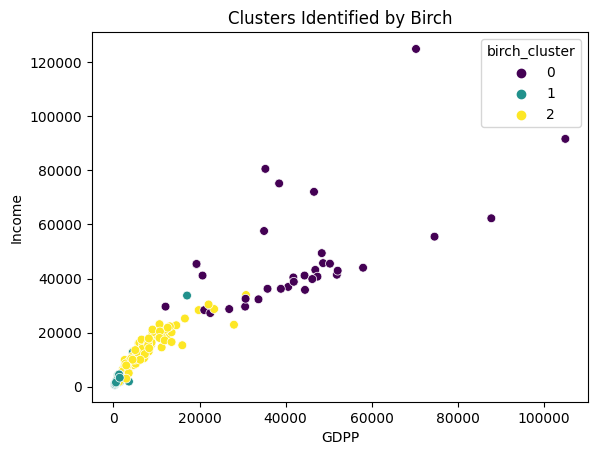

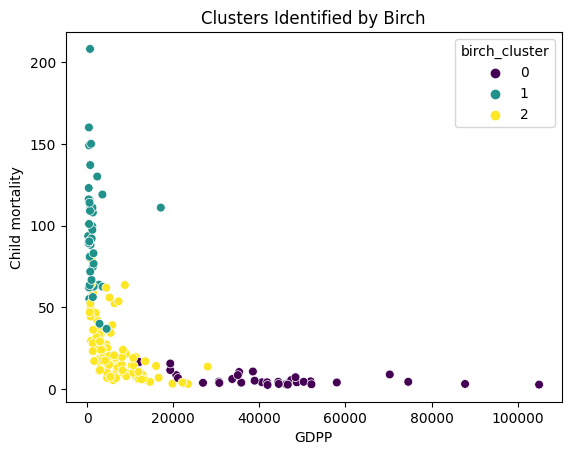

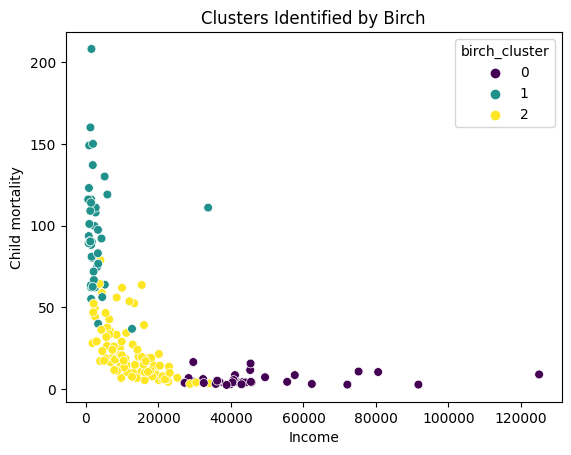

In [227]:
birch_clusters= Birch(threshold=0.08, n_clusters=clusterNumber).fit_predict(input_data_normalized)
countries_raw_data['birch_cluster'] = birch_clusters
seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="income", hue='birch_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Birch')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="child_mort", hue='birch_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Birch')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="income", y="child_mort", hue='birch_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by Birch')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

In [228]:
range_eps = [0.05 + x * 0.05 for x in range(20)]
min_samples_list = [2 + x for x in range(50)]
silhoutte_avgs = {}
for i in range_eps:
    for j in min_samples_list:
        db = DBSCAN(eps=i, min_samples=j).fit(input_data_normalized)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        print(set(labels))
        if len(set(labels)) == 1 and (-1 in labels or 0 in labels):
            print(f"For eps={i} and min_samples={j} silhouette score not avaliable. Only cluster detected")
            continue
        silhoutte_avg = silhouette_score(input_data_normalized, labels)
        silhoutte_avgs[silhoutte_avg] = (i, j)
        print(f"For eps={i} and min_samples={j} average silhouette score is {silhoutte_avg}")
print("Best scroe is", max(silhoutte_avgs.keys()),silhoutte_avgs[max(silhoutte_avgs.keys())])

{0, -1}
For eps=0.05 and min_samples=2 average silhouette score is -0.22341564399975072
{-1}
For eps=0.05 and min_samples=3 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=4 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=5 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=6 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=7 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=8 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=9 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=10 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=11 silhouette score not avaliable. Only cluster detected
{-1}
For eps=0.05 and min_samples=12 silhouette score not avaliable. Only cluster detected
{-1}
For 

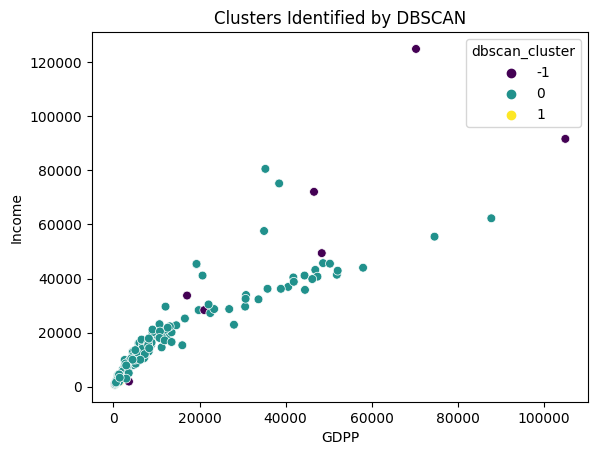

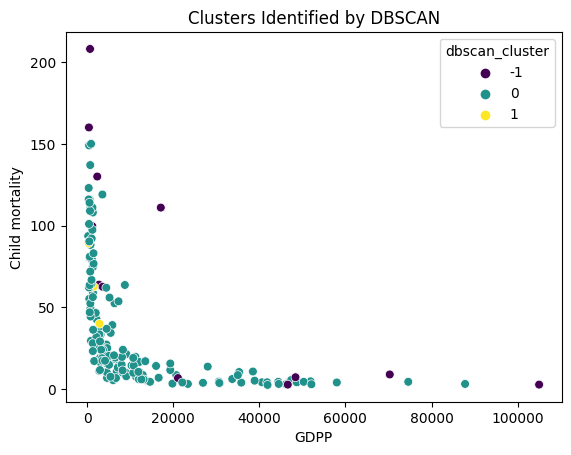

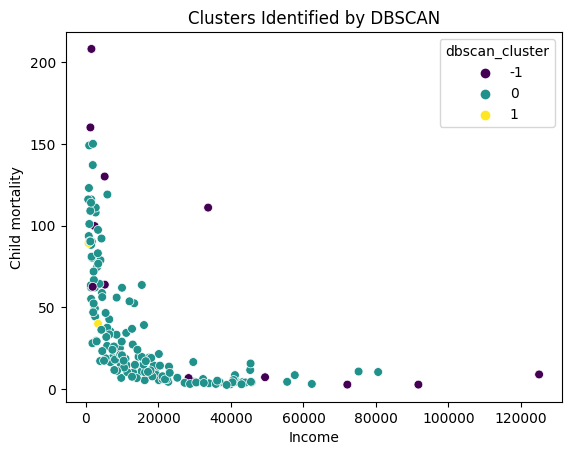

In [229]:
data_dbscan = DBSCAN(eps=0.3, min_samples=2).fit_predict(input_data_normalized)
countries_raw_data['dbscan_cluster'] = data_dbscan
seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="income", hue='dbscan_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by DBSCAN')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="child_mort", hue='dbscan_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by DBSCAN')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="income", y="child_mort", hue='dbscan_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by DBSCAN')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

In [230]:
range_eps = [0.05 + x * 0.05 for x in range(20)]
min_samples_list = [2 + x for x in range(50)]
silhoutte_avgs = {}
for i in range_eps:
    for j in min_samples_list:
        db = OPTICS(eps=i, min_samples=j).fit(input_data_normalized)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.cluster_hierarchy_] = True
        labels = db.labels_
        print(set(labels))
        if len(set(labels)) == 1 and (-1 in labels or 0 in labels):
            print(f"For eps={i} and min_samples={j} silhouette score not avaliable. Only cluster detected")
            continue
        silhoutte_avg = silhouette_score(input_data_normalized, labels)
        silhoutte_avgs[silhoutte_avg] = (i, j)
        print(f"For eps={i} and min_samples={j} average silhouette score is {silhoutte_avg}")
print("Best scroe is", max(silhoutte_avgs.keys()),silhoutte_avgs[max(silhoutte_avgs.keys())])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, -1}
For eps=0.05 and min_samples=2 average silhouette score is -0.18093880104034085
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
For eps=0.05 and min_samples=3 average silhouette score is -0.25450534442363637
{0, 1, 2, 3, 4, -1}
For eps=0.05 and min_samples=4 average silhouette score is -0.3171648179536397
{0, 1, 2, 3, -1}
For eps=0.05 and min_samples=5 average silhouette score is -0.2622648461168463
{0, 1, -1}
For eps=0.05 and min_samples=6 average silhouette score is -0.09472935987018923
{0, 1, -1}
For eps=0.05 and min_samples=7 average silhouette score is 0.09839288812653395
{0, 1, 2, -1}
For eps=0.05 and min_samples=8 average silhouette score is 0.13867342655969067
{0, 1, -1}
For eps=0.05 and min_samples=9 average silhouette score is 0.043836251891352734
{0, -1}
For eps=0.05 and min_samples=10 average silhouette score is 0.16428411979344246
{0, -1}
For eps=0.05 and min_samples=1

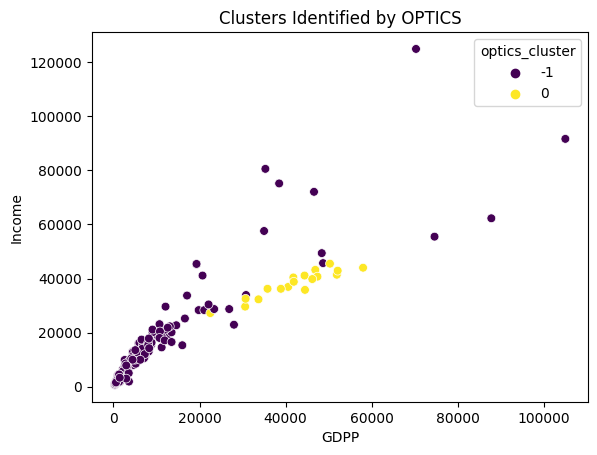

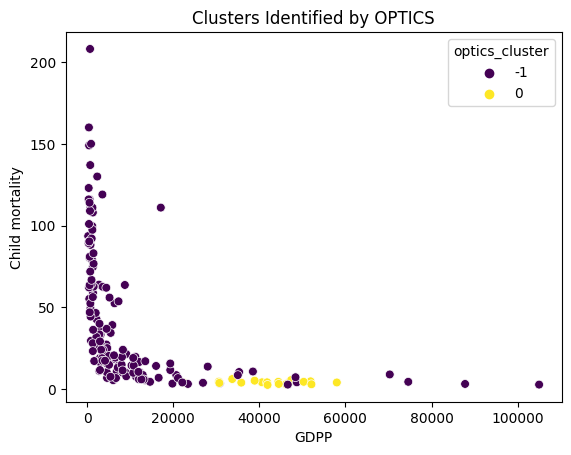

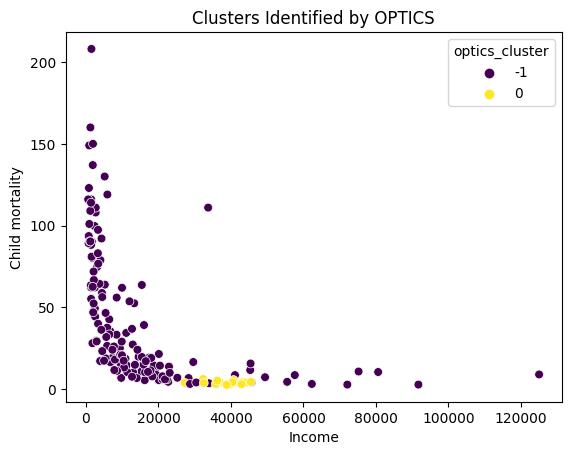

In [231]:
optics_clusters = OPTICS(eps=0.6, min_samples=10).fit_predict(input_data_normalized)
countries_raw_data['optics_cluster'] = optics_clusters
seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="income", hue='optics_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by OPTICS')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="gdpp", y="child_mort", hue='optics_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by OPTICS')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data=countries_raw_data, x="income", y="child_mort", hue='optics_cluster', s=40, palette='viridis')
plt.title('Clusters Identified by OPTICS')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

In [232]:
display(countries_raw_data)

country  child_mort  exports  health   imports  \
0                       Afghanistan        90.2   10.000    7.58   44.9000   
1                           Albania        16.6   28.000    6.55   48.6000   
2                           Algeria        27.3   38.400    4.17   31.4000   
3                            Angola       119.0   62.300    2.85   42.9000   
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   
5                         Argentina        14.5   18.900    8.10   16.0000   
6                           Armenia        18.1   20.800    4.40   45.3000   
7                         Australia         4.8   19.800    8.73   20.9000   
8                           Austria         4.3   51.300   11.00   47.8000   
9                        Azerbaijan        39.2   54.300    5.88   20.7000   
10                          Bahamas        13.8   35.000    7.89   43.7000   
11                          Bahrain         8.6   69.500    4.97   50.9000   
12                       Bangladesh        49.4   16.000    3.52   21.8000   
13                         Barbados        14.2   39.500    7.97   48.7000   
14                          Belarus         5.5   51.400    5.61   64.5000   
15                          Belgium         4.5   76.400   10.70   74.7000   
16                           Belize        18.8   58.200    5.20   57.5000   
17                            Benin       111.0   23.800    4.10   37.2000   
18                           Bhutan        42.7   42.500    5.20   70.7000   
19                          Bolivia        46.6   41.200    4.84   34.3000   
20           Bosnia and Herzegovina         6.9   29.700   11.10   51.3000   
21                         Botswana        52.5   43.600    8.30   51.3000   
22                           Brazil        19.8   10.700    9.01   11.8000   
23                           Brunei        10.5   67.400    2.84   28.0000   
24                         Bulgaria        10.8   50.200    6.87   53.0000   
25                     Burkina Faso       116.0   19.200    6.74   29.6000   
26                          Burundi        93.6    8.920   11.60   39.2000   
27                         Cambodia        44.4   54.100    5.68   59.5000   
28                         Cameroon       108.0   22.200    5.13   27.0000   
29                           Canada         5.6   29.100   11.30   31.0000   
30                       Cape Verde        26.5   32.700    4.09   61.8000   
31         Central African Republic       149.0   11.800    3.98   26.5000   
32                             Chad       150.0   36.800    4.53   43.5000   
33                            Chile         8.7   37.700    7.96   31.3000   
34                            China        15.7   26.300    5.07   22.6000   
35                         Colombia        18.6   15.900    7.59   17.8000   
36                          Comoros        88.2   16.500    4.51   51.7000   
37                 Congo, Dem. Rep.       116.0   41.100    7.91   49.6000   
38                      Congo, Rep.        63.9   85.100    2.46   54.7000   
39                       Costa Rica        10.2   33.200   10.90   35.0000   
40                    Cote d'Ivoire       111.0   50.600    5.30   43.3000   
41                          Croatia         5.5   37.600    7.76   38.1000   
42                           Cyprus         3.6   50.200    5.97   57.5000   
43                   Czech Republic         3.4   66.000    7.88   62.9000   
44                          Denmark         4.1   50.500   11.40   43.6000   
45               Dominican Republic        34.4   22.700    6.22   33.3000   
46                          Ecuador        25.1   27.900    8.06   32.4000   
47                            Egypt        29.1   21.300    4.66   26.6000   
48                      El Salvador        19.2   26.900    6.91   46.6000   
49                Equatorial Guinea       111.0   85.800    4.48   58.9000   
50                          Eritrea        55.2   

In [241]:
display("Countries with smallest GDPP and income", countries_raw_data.nsmallest(7, ['gdpp', 'income']))
display("Countries with highest child mortality", countries_raw_data.nlargest(7, ['child_mort']))

'Countries with smallest GDPP and income'

country  child_mort  exports  health  imports  income  \
26            Burundi        93.6     8.92   11.60     39.2     764   
88            Liberia        89.3    19.10   11.80     92.6     700   
37   Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
112             Niger       123.0    22.20    5.16     49.1     814   
132      Sierra Leone       160.0    16.80   13.10     34.5    1220   
93         Madagascar        62.2    25.00    3.77     43.0    1390   
106        Mozambique       101.0    31.50    5.21     46.2     918   

     inflation  life_expec  total_fer  gdpp  kmeans_cluster  \
26       12.30        57.7       6.26   231               1   
88        5.47        60.8       5.02   327               1   
37       20.80        57.5       6.54   334               1   
112       2.55        58.8       7.49   348               1   
132      17.20        55.0       5.20   399               1   
93        8.79        60.8       4.60   413               1   
106       7.64        54.5       5.56   419               1   

     mini_kmeans_cluster  spectral_cluster  birch_cluster  dbscan_cluster  \
26                     1                 1              1               0   
88                     1                 1              1               1   
37                     2                 1              1               0   
112                    2                 1              1               0   
132                    1                 1              1              -1   
93                     2                 1              1               0   
106                    2                 1              1               0   

     optics_cluster  
26               -1  
88               -1  
37               -1  
112              -1  
132              -1  
93               -1  
106              -1

'Countries with highest child mortality'

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
113                   Nigeria       130.0     25.3    5.07     17.4    5150   
112                     Niger       123.0     22.2    5.16     49.1     814   

     inflation  life_expec  total_fer  gdpp  kmeans_cluster  \
66        5.45        32.1       3.33   662               1   
132      17.20        55.0       5.20   399               1   
32        6.39        56.5       6.59   897               1   
31        2.01        47.5       5.21   446               1   
97        4.37        59.5       6.55   708               1   
113     104.00        60.5       5.84  2330               1   
112       2.55        58.8       7.49   348               1   

     mini_kmeans_cluster  spectral_cluster  birch_cluster  dbscan_cluster  \
66                     1                 1              1              -1   
132                    1                 1              1              -1   
32                     2                 1              1               0   
31                     2                 1              1               0   
97                     2                 1              1               0   
113                    2                 1              1              -1   
112                    2                 1              1               0   

     optics_cluster  
66               -1  
132              -1  
32               -1  
31               -1  
97               -1  
113              -1  
112              -1

In [243]:
display("Countries with highest GDPP and income", countries_raw_data.nlargest(7, ['gdpp', 'income']))
display("Countries with lowest child mortality", countries_raw_data.nsmallest(7, ['child_mort']))

'Countries with highest GDPP and income'

country  child_mort  exports  health  imports  income  inflation  \
91    Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
114       Norway         3.2     39.7    9.48     28.5   62300      5.950   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
123        Qatar         9.0     62.3    1.81     23.8  125000      6.980   
44       Denmark         4.1     50.5   11.40     43.6   44000      3.220   
144       Sweden         3.0     46.2    9.63     40.7   42900      0.991   
7      Australia         4.8     19.8    8.73     20.9   41400      1.160   

     life_expec  total_fer    gdpp  kmeans_cluster  mini_kmeans_cluster  \
91         81.3       1.63  105000               2                    0   
114        81.0       1.95   87800               2                    0   
145        82.2       1.52   74600               2                    0   
123        79.5       2.07   70300               2                    0   
44         79.5       1.87   58000               2                    0   
144        81.5       1.98   52100               2                    0   
7          82.0       1.93   51900               2                    0   

     spectral_cluster  birch_cluster  dbscan_cluster  optics_cluster  
91                  2              0              -1              -1  
114                 2              0               0              -1  
145                 2              0               0              -1  
123                 2              0              -1              -1  
44                  2              0               0               0  
144                 2              0               0               0  
7                   2              0               0               0

'Countries with lowest child mortality'

country  child_mort  exports  health  imports  income  inflation  \
68      Iceland         2.6     53.4    9.40     43.3   38800      5.470   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
53      Finland         3.0     38.7    8.95     37.4   39800      0.351   
144      Sweden         3.0     46.2    9.63     40.7   42900      0.991   
77        Japan         3.2     15.0    9.49     13.6   35800     -1.900   
114      Norway         3.2     39.7    9.48     28.5   62300      5.950   

     life_expec  total_fer    gdpp  kmeans_cluster  mini_kmeans_cluster  \
68         82.0       2.20   41900               2                    0   
91         81.3       1.63  105000               2                    0   
133        82.7       1.15   46600               2                    0   
53         80.0       1.87   46200               2                    0   
144        81.5       1.98   52100               2                    0   
77         82.8       1.39   44500               2                    0   
114        81.0       1.95   87800               2                    0   

     spectral_cluster  birch_cluster  dbscan_cluster  optics_cluster  
68                  2              0               0               0  
91                  2              0              -1              -1  
133                 2              0              -1              -1  
53                  2              0               0               0  
144                 2              0               0               0  
77                  2              0               0               0  
114                 2              0               0              -1

In [248]:
display("Poor countries by spectral clusters", countries_raw_data[countries_raw_data['spectral_cluster'] == 1])
display("Developing countries by spectral clusters", countries_raw_data[countries_raw_data['spectral_cluster'] == 0])
display("Developed countries by spectral clusters", countries_raw_data[countries_raw_data['spectral_cluster'] == 2])

'Poor countries by spectral clusters'

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  kmeans_cluster  \
0        9.440        56.2       5.82    553               1   
3       22.400        60.1       6.16   3530               1   
17       0.885        61.8       5.36    758               1   
25       6.810        57.9       5.87    575               1   
26      12.300        57.7       6.26    231               1   
28       1.910        57.3       5.11   1310               1   
31       2.010        47.5       5.21    446               1   
32       6.390        56.5       6.59    897               1   
36       3.870        65.9       4.75    769               1   
37      20.800        57.5       6.54    334               1   

'Developing countries by spectral clusters'

country  child_mort  exports  health   imports  \
1                           Albania        16.6   28.000    6.55   48.6000   
2                           Algeria        27.3   38.400    4.17   31.4000   
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   
5                         Argentina        14.5   18.900    8.10   16.0000   
6                           Armenia        18.1   20.800    4.40   45.3000   
9                        Azerbaijan        39.2   54.300    5.88   20.7000   
10                          Bahamas        13.8   35.000    7.89   43.7000   
11                          Bahrain         8.6   69.500    4.97   50.9000   
12                       Bangladesh        49.4   16.000    3.52   21.8000   
13                         Barbados        14.2   39.500    7.97   48.7000   
14                          Belarus         5.5   51.400    5.61   64.5000   
16                           Belize        18.8   58.200    5.20   57.5000   
18                           Bhutan        42.7   42.500    5.20   70.7000   
19                          Bolivia        46.6   41.200    4.84   34.3000   
20           Bosnia and Herzegovina         6.9   29.700   11.10   51.3000   
21                         Botswana        52.5   43.600    8.30   51.3000   
22                           Brazil        19.8   10.700    9.01   11.8000   
24                         Bulgaria        10.8   50.200    6.87   53.0000   
27                         Cambodia        44.4   54.100    5.68   59.5000   
30                       Cape Verde        26.5   32.700    4.09   61.8000   
33                            Chile         8.7   37.700    7.96   31.3000   
34                            China        15.7   26.300    5.07   22.6000   
35                         Colombia        18.6   15.900    7.59   17.8000   
39                       Costa Rica        10.2   33.200   10.90   35.0000   
41                          Croatia         5.5   37.600    7.76   38.1000   
42                           Cyprus         3.6   50.200    5.97   57.5000   
43                   Czech Republic         3.4   66.000    7.88   62.9000   
45               Dominican Republic        34.4   22.700    6.22   33.3000   
46                          Ecuador        25.1   27.900    8.06   32.4000   
47                            Egypt        29.1   21.300    4.66   26.6000   
48                      El Salvador        19.2   26.900    6.91   46.6000   
51                          Estonia         4.5   75.100    6.03   68.7000   
52                             Fiji        24.1   57.800    4.86   63.9000   
55                            Gabon        63.7   57.700    3.50   18.9000   
57                          Georgia        16.5   35.000   10.10   52.8000   
60                           Greece         3.9   22.100   10.30   30.7000   
61                          Grenada        14.6   23.800    5.86   49.2000   
62                        Guatemala        35.4   25.800    6.85   36.3000   
65                           Guyana        37.6   51.400    5.38   79.1000   
67                          Hungary         6.0   81.800    7.33   76.5000   
69                            India        58.8   22.600    4.05   27.1000   
70                        Indonesia        33.3   24.300    2.61   22.4000   
71                             Iran        19.3   24.400    5.60   19.4000   
72                             Iraq        36.9   39.400    8.41   34.1000   
74                           Israel         4.6   35.000    7.63   32.9000   
76                          Jamaica        18.1   31.300    4.81   49.6000   
78                           Jordan        21.1   48.300    8.04   69.0000   
79                       Kazakhstan        21.5   44.200    4.29   29.9000   
83                  Kyrgyz Republic        29.6   51.600    6.18   81.7000   
84                              Lao        78.9   35.400    4.47   49.3000   
85                           Latvia         7.8   

'Developed countries by spectral clusters'

country  child_mort  exports  health  imports  income  \
7               Australia         4.8     19.8    8.73     20.9   41400   
8                 Austria         4.3     51.3   11.00     47.8   43200   
15                Belgium         4.5     76.4   10.70     74.7   41100   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
29                 Canada         5.6     29.1   11.30     31.0   40700   
44                Denmark         4.1     50.5   11.40     43.6   44000   
53                Finland         3.0     38.7    8.95     37.4   39800   
54                 France         4.2     26.8   11.90     28.1   36900   
58                Germany         4.2     42.3   11.60     37.1   40400   
68                Iceland         2.6     53.4    9.40     43.3   38800   
73                Ireland         4.2    103.0    9.19     86.5   45700   
75                  Italy         4.0     25.2    9.53     27.2   36200   
77                  Japan         3.2     15.0    9.49     13.6   35800   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
98                  Malta         6.8    153.0    8.65    154.0   28300   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
114                Norway         3.2     39.7    9.48     28.5   62300   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
133             Singapore         2.8    200.0    3.96    174.0   72100   
139                 Spain         3.8     25.5    9.54     26.8   32500   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer    gdpp  kmeans_cluster  \
7        1.160        82.0       1.93   51900               2   
8        0.873        80.5       1.44   46900               2   
15       1.880        80.0       1.86   44400               2   
23      16.700        77.1       1.84   35300               2   
29       2.870        81.3       1.63   47400               2   
44       3.220        79.5       1.87   58000               2   
53       0.351        80.0       1.87   46200               2   
54       1.050        81.4       2.03   40600               2   
58       0.758        80.1       1.39   41800               2   
68       5.470        82.0       2.20   41900               2   
73      -3.220        80.4       2.05   48700               2   
75       0.319        81.7       1.46   35800               2   
77      -1.900        82.8       1.39   44500               2   
82      11.200        78.2       2.21   38500               2   
91       3.620        81.3       1.63  105000               2   
98       3.830        80.3       1.36   21100               2   
110      0.848        80.7       1.79   50300               2   
111      3.730        80.9       2.17   33700               2   
114      5.950        81.0       1.95   87800               2   
123      6.980        79.5       2.07   70300               2   
133     -0.046        82.7       1.15   46600               2   
139      0.160        81.9       1.37   30700               2   
144      0.991        81.5       1.98   52100               2   
145      0.317        82.2       1.52   74600               2   
157     12.500        76.5       1.87   35000               2   
158      1.570        80.3       1.92   38900               2   
159      1.220        78.7       1.93   48400               2   

     mini_kmeans_cluster  spectral_cluster  birch_cluster  dbscan_cluster  \
7                  

In [254]:
poor_countries = countries_raw_data[countries_raw_data['spectral_cluster'] == 1]

poor_countries_by_income = poor_countries.sort_values(by='income', ascending=False)
poor_countries_by_gdpp = poor_countries.sort_values(by='gdpp', ascending=False)
poor_countries_by_child_mort = poor_countries.sort_values(by='child_mort', ascending=False)

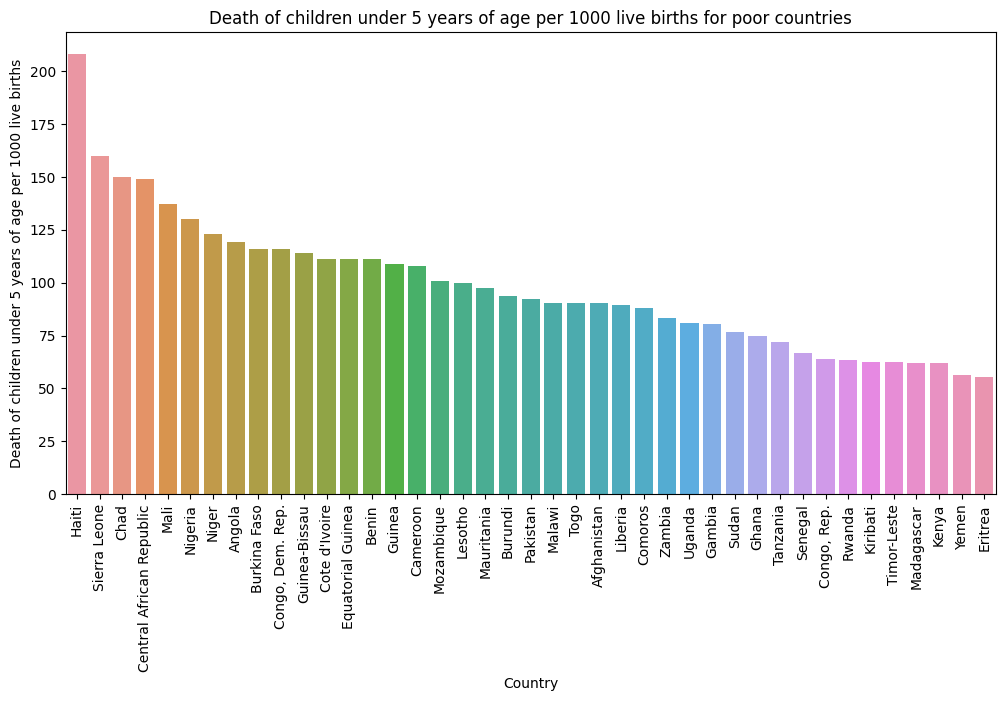

In [259]:
fig = plt.figure(figsize = (12,6))
s=seaborn.barplot(x='country',y='child_mort',data=poor_countries_by_child_mort)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Death of children under 5 years of age per 1000 live births', fontsize=10)
plt.title('Death of children under 5 years of age per 1000 live births for poor countries')
plt.show()

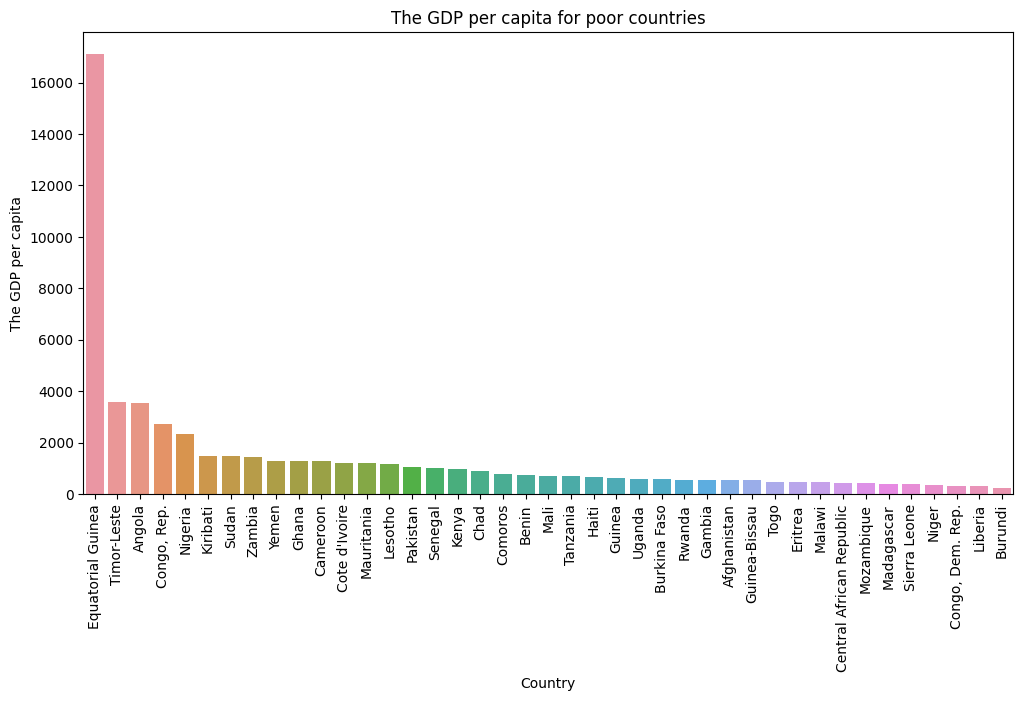

In [261]:
fig = plt.figure(figsize = (12,6))
s=seaborn.barplot(x='country',y='gdpp',data=poor_countries_by_gdpp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('The GDP per capita', fontsize=10)
plt.title('The GDP per capita for poor countries')
plt.show()

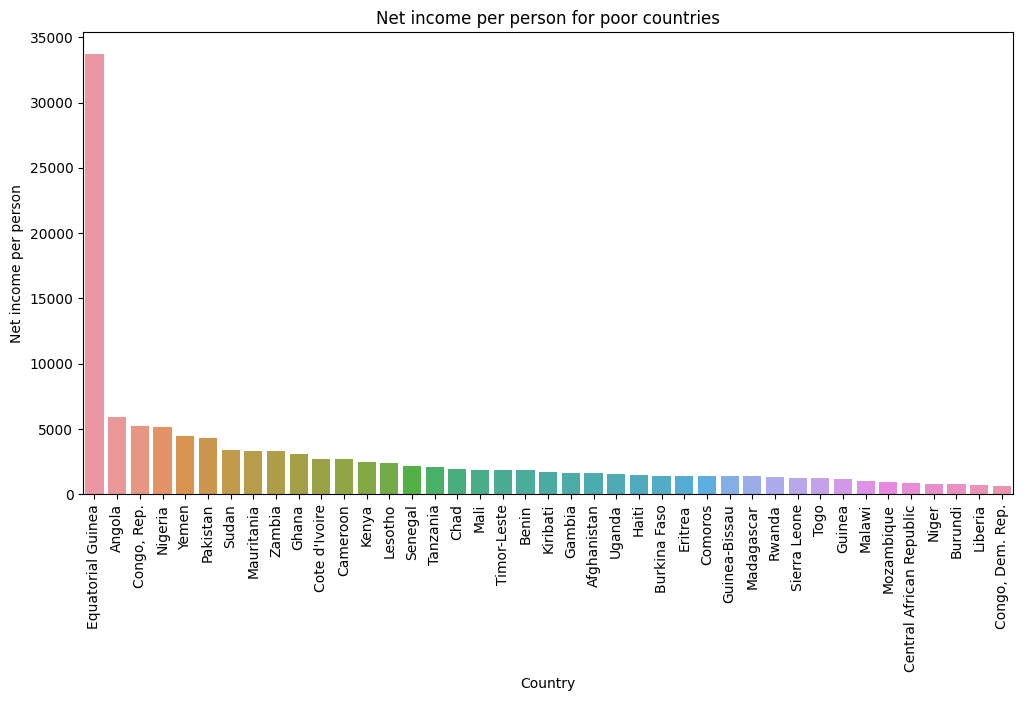

In [258]:
fig = plt.figure(figsize = (12,6))
s=seaborn.barplot(x='country',y='income',data=poor_countries_by_income)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Net income per person', fontsize=10)
plt.title('Net income per person for poor countries')
plt.show()

In [268]:
display(poor_countries.sort_values(by=['child_mort', 'income','gdpp'], ascending=[False, True, True]).drop(['kmeans_cluster', 'mini_kmeans_cluster', 'spectral_cluster', 'birch_cluster', 'dbscan_cluster', 'optics_cluster'], axis=1))

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0    15.30    6.91     64.7    1500   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
32                       Chad       150.0    36.80    4.53     43.5    1930   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
97                       Mali       137.0    22.80    4.98     35.1    1870   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
112                     Niger       123.0    22.20    5.16     49.1     814   
3                      Angola       119.0    62.30    2.85     42.9    5900   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
17                      Benin       111.0    23.80    4.10     37.2    1820   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
106                Mozambique       101.0    31.50    5.21     46.2     918   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
26                    Burundi        93.6     8.92   11.60     39.2     764   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
150                      Togo        90.3    40.20    7.65     57.3    1210   
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
88                    Liberia        89.3    19.10   11.80     92.6     700   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
166                    Zambia        83.1    37.00    5.89     30.9    3280   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   

     inflation  life_expec  total_fer   gdpp  
66       5.450        32.1       3.33    662  
132     17.200        55.0       5.20    399  
32       6.390        56.5       6.59    897  
31       2.010        47.5       5.21    446  
97       4.370        59.5       6.55    708  
113    104.000        60.5       5.84   2330  
112      2.550        58.8       7.49    348  
3       22.400        60.1       6.16   3530  
37      20.800        57.5       6.54    334  
25       6.810        57.9       5.87    575  
64       2.970        55.6       5.05    547  
17       0.885        61.8       5.36    758  
40       5.390        56.3       5.27   1220  
49      24.900        60.9       5.21  17100 

In [290]:
poor_by_child_mort_ = poor_countries_by_child_mort.head(10)
poor_by_child_mort_['country']

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
25                 Burkina Faso
37             Congo, Dem. Rep.
Name: country, dtype: object

In [289]:
poor_by_income_ = poor_countries_by_income.tail(10)
poor_by_income_['country']

132                Sierra Leone
150                        Togo
63                       Guinea
94                       Malawi
106                  Mozambique
31     Central African Republic
112                       Niger
26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
Name: country, dtype: object

In [288]:
poor_by_gdpp_ = poor_countries_by_gdpp.tail(10)
poor_by_gdpp_['country']

50                      Eritrea
94                       Malawi
31     Central African Republic
106                  Mozambique
93                   Madagascar
132                Sierra Leone
112                       Niger
37             Congo, Dem. Rep.
88                      Liberia
26                      Burundi
Name: country, dtype: object

In [312]:
poor_list = list(poor_by_child_mort_['country'])
poor_list.extend(list(poor_by_income_['country']))
poor_list.extend(list(poor_by_gdpp_['country']))

duplicates = [country for country in poor_list if poor_list.count(country) > 1]
display("Countries with highest child mortality and lowest income and gdpp at same time",set(duplicates))

'Countries with highest child mortality and lowest income and gdpp at same time'

{'Burundi',
 'Central African Republic',
 'Congo, Dem. Rep.',
 'Liberia',
 'Malawi',
 'Mozambique',
 'Niger',
 'Sierra Leone'}

In [331]:
display(any(duplicates))
display(poor_countries[poor_countries['country'].isin(duplicates)].drop(['kmeans_cluster', 'mini_kmeans_cluster', 'spectral_cluster', 'birch_cluster', 'dbscan_cluster', 'optics_cluster'], axis=1).sort_values(by='child_mort', ascending=False))

True

country  child_mort  exports  health  imports  income  \
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
112                     Niger       123.0    22.20    5.16     49.1     814   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
106                Mozambique       101.0    31.50    5.21     46.2     918   
26                    Burundi        93.6     8.92   11.60     39.2     764   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
88                    Liberia        89.3    19.10   11.80     92.6     700   

     inflation  life_expec  total_fer  gdpp  
132      17.20        55.0       5.20   399  
31        2.01        47.5       5.21   446  
112       2.55        58.8       7.49   348  
37       20.80        57.5       6.54   334  
106       7.64        54.5       5.56   419  
26       12.30        57.7       6.26   231  
94       12.10        53.1       5.31   459  
88        5.47        60.8       5.02   327